In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
data=pd.read_csv('car_data.csv')

In [34]:
data1=data.copy()

In [35]:
data1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [36]:
# Check Duplication
data1.duplicated().sum()

2

In [37]:
duplicate_rows = data[data1.duplicated(keep=False)]
print(duplicate_rows)


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
17       Dealer       Manual      0  
51       Dealer    Automatic      0  
93       Dealer    Automatic      0  


In [38]:
data1.drop_duplicates(inplace=True)

In [39]:
data1.duplicated().sum()

0

In [41]:
encoded_data = pd.get_dummies(data1, columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])

# Display the updated dataset
print(encoded_data.head())

   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_800  \
0  2014           3.35           5.59       27000      0         False   
1  2013           4.75           9.54       43000      0         False   
2  2017           7.25           9.85        6900      0         False   
3  2011           2.85           4.15        5200      0         False   
4  2014           4.60           6.87       42450      0         False   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               False               False                   False   
1               False               False                   False   
2               False               False                   False   
3               False               False                   False   
4               False               False                   False   

   Car_Name_Bajaj Avenger 150  ...  Car_Name_vitara brezza  Car_Name_wagon r  \
0                       False  ...                   False  

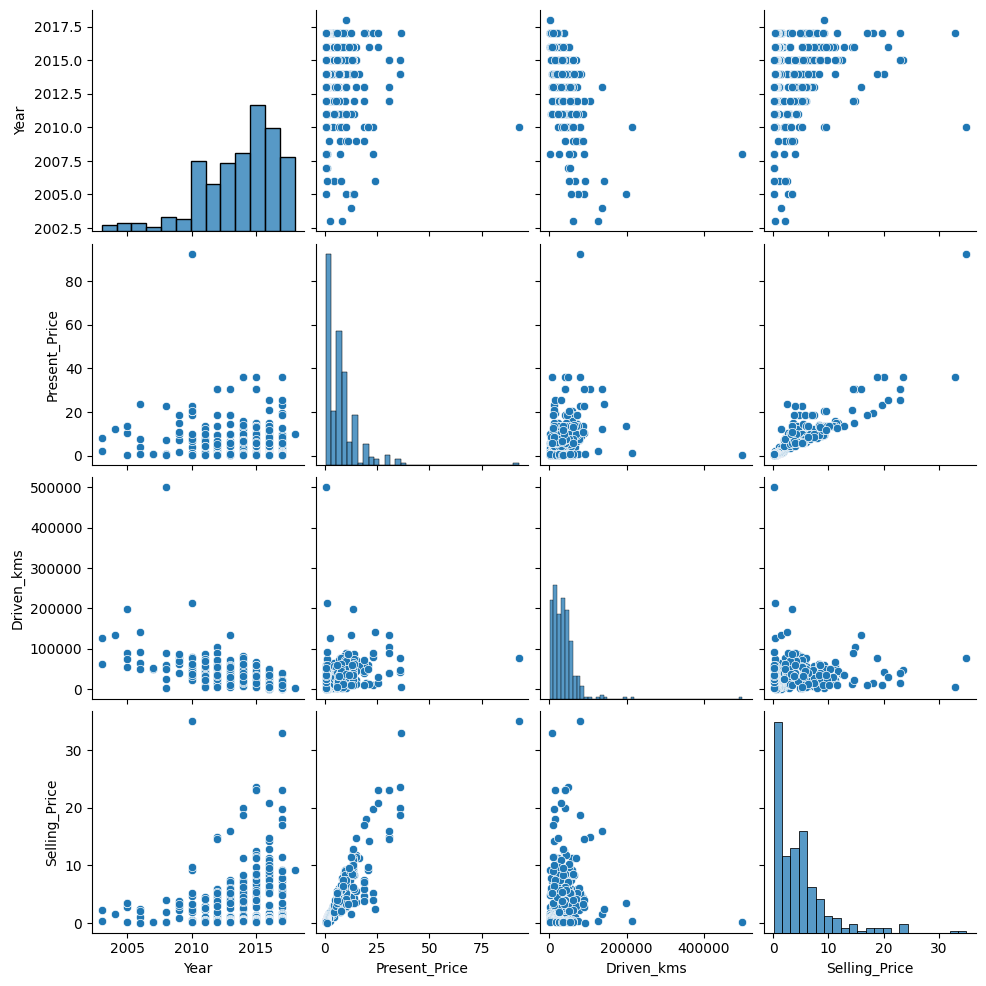

In [57]:
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Selling_Price']
sns.pairplot(data[numerical_features])
plt.show()

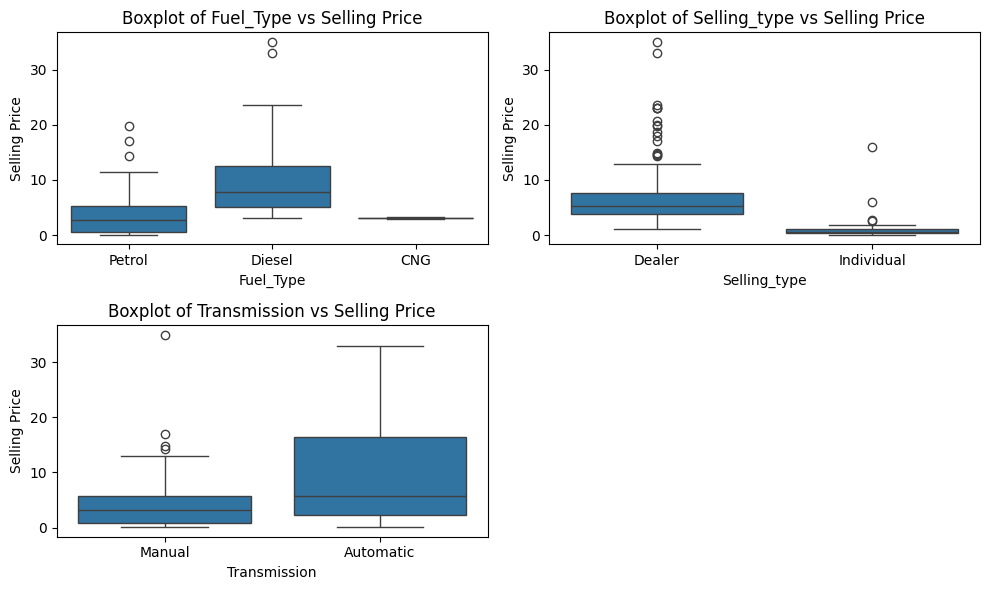

In [58]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=feature, y='Selling_Price', data=data)
    plt.title(f'Boxplot of {feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

In [67]:
data1.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [68]:
numeric_data = data1.select_dtypes(include=['float64', 'int64'])

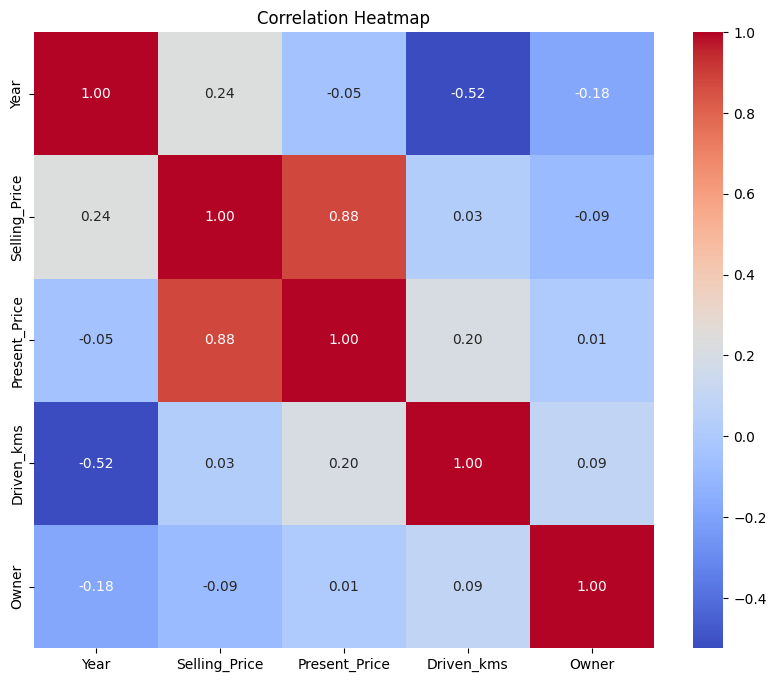

In [62]:
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##

In [69]:
X = data1.drop('Selling_Price', axis=1)
y = data1['Selling_Price'] 

In [44]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [63]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [64]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Year', 'Present_Price', 'Driven_kms',
                                  'Selling_Price']),
                                ('cat', OneHotEncoder(),
                                 ['Fuel_Type', 'Selling_type',
                                  'Transmission'])])

In [48]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [49]:
model_pipeline 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [53]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Present_Price',
                                                                          'Driven_kms',
                                                                          'Owner']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Fuel_Type',
                                                                          'Selling_type',
                                                                          'Transmission'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10, 15],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [54]:
# Best hyperparameters and model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [55]:
# Predictions and evaluation
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Absolute Error: 0.6101344262295083
Mean Squared Error: 0.8263443475409831
R-squared: 0.9641274851604863
